# Análisis de Datos Exploratorio de datos de TIMESAT
## Análisis Estadísitco 
---

Equipo:



*   Martha Juarez 
*   Adilene Calderón
*   Paola Velez
*   Benjamin Lopez
*   Carlos Velázquez
*   Ibsan Morales
*   Manuel Valenzuela
*   Samuel Cortez

## Se importan librerías

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import scikit_posthocs as sp

In [18]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

## Lectura de Datos

In [5]:
path_evi = './TIMESAT/EVI/VAR_FEN_EVI_D&F.xlsx'
datos_evi = pd.read_excel(path_evi,
                          sheet_name=0)
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


In [6]:
path_ndvi = './TIMESAT/NDVI/VAR_FEN_NDVI_D&F.xlsx'
datos_ndvi = pd.read_excel(path_ndvi,
                           sheet_name=0)
datos_ndvi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,11.09,0,177.44,3145,14.41,230.56,70050,33880
1,ENCINAR_D,34.09,23,177.44,3019,18.90,302.40,89970,42230
2,ENCINAR_D,57.69,46,187.04,2814,17.88,286.08,79660,33570
3,ENCINAR_D,81.90,69,206.40,3614,17.36,277.76,83110,39800
4,ENCINAR_D,104.60,92,201.60,2878,18.26,292.16,81110,36720


In [8]:
datos_ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CLASE_VEG     280 non-null    object 
 1   inicio        280 non-null    float64
 2   inicio - (X)  280 non-null    int64  
 3   INICIO        280 non-null    float64
 4   AMPLITUD      280 non-null    int64  
 5   duracion      280 non-null    float64
 6   DURACION      280 non-null    float64
 7   INTMAY        280 non-null    int64  
 8   INTMEN        280 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 19.8+ KB


## Explorando Datos EVI (variables fenologicas)

In [12]:
#Observamos los 5 primeros registros de los datos
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


In [9]:
datos_evi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CLASE_VEG     280 non-null    object 
 1   inicio        280 non-null    float64
 2   inicio - (X)  280 non-null    int64  
 3   INICIO        280 non-null    float64
 4   AMPLITUD      280 non-null    int64  
 5   duracion      280 non-null    float64
 6   DURACION      280 non-null    float64
 7   INTMAY        280 non-null    int64  
 8   INTMEN        280 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 19.8+ KB


In [7]:
#Analizando dimensiones del Dataset
print("Dimensiones del Dataset:")
print("-" * 25)
print(f"Registros: {datos_evi.shape[0]}")
print(f"Columnas: {datos_evi.shape[1]}")
print("-" * 25)

Dimensiones del Dataset:
-------------------------
Registros: 280
Columnas: 9
-------------------------


In [10]:
#Cambiando tipo de datos
datos_evi['CLASE_VEG'] = datos_evi['CLASE_VEG'].astype('category')
datos_evi.dtypes

CLASE_VEG       category
inicio           float64
inicio - (X)       int64
INICIO           float64
AMPLITUD           int64
duracion         float64
DURACION         float64
INTMAY             int64
INTMEN             int64
dtype: object

In [69]:
#Observando valores perdidos
datos_evi.isnull().sum(axis = 0)

CLASE_VEG       0
inicio          0
inicio - (X)    0
INICIO          0
AMPLITUD        0
duracion        0
DURACION        0
INTMAY          0
INTMEN          0
dtype: int64

In [12]:
#Observando valores duplicados
duplicate_rows_df = datos_evi[datos_evi.duplicated()]
duplicate_rows_df.shape
print(f'Numero de registros duplicados: {duplicate_rows_df.shape[0]}')

Numero de registros duplicados: 0


In [70]:
#Renombrando columnas
datos_evi = datos_evi.rename(columns={'AMPLITUD ': 'AMPLITUD'})

### EDA

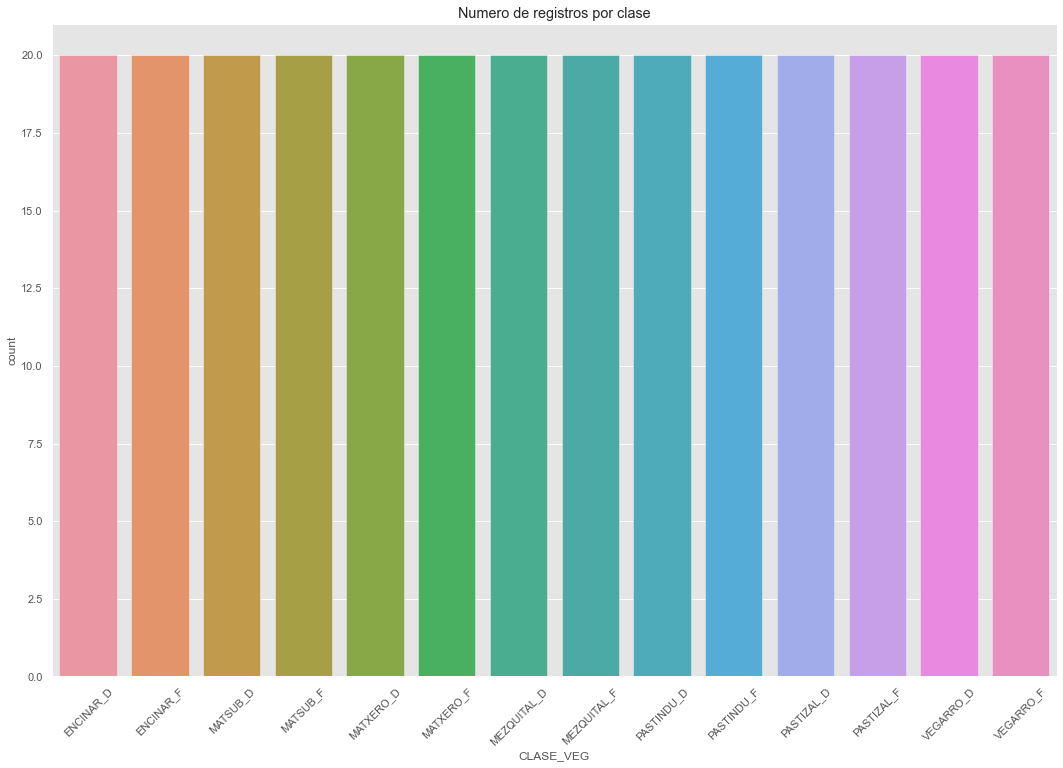

In [72]:
#Analizando numero de registros por clase
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = datos_evi, x = 'CLASE_VEG')
plt.title('Numero de registros por clase')
plt.xticks(rotation = 45)
plt.show()

Agrupamiento por Clase Vegetación

In [75]:
evi_group = datos_evi.groupby('CLASE_VEG')

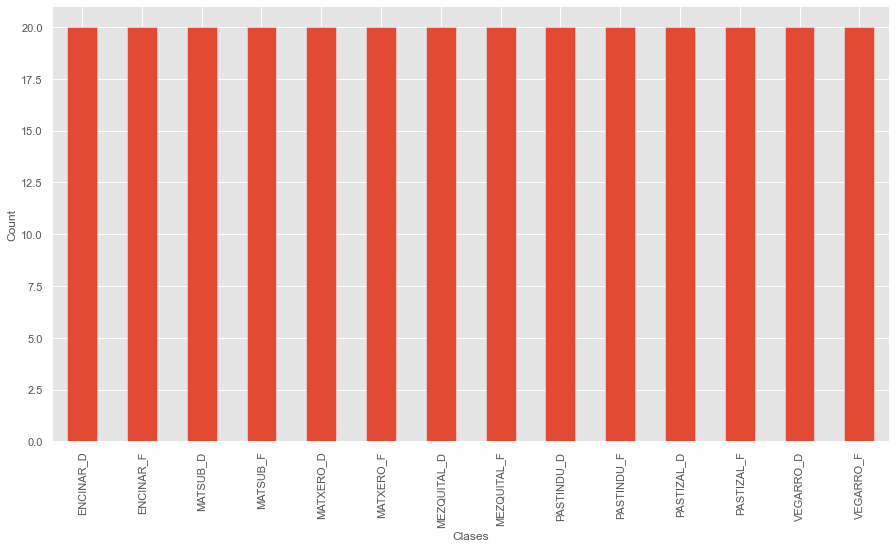

In [87]:
evi_count = evi_group.apply(lambda df: len(df))
ax_CV = evi_count.plot(kind = 'bar',
                       xlabel = 'Clases',
                       ylabel = 'Count',
                       figsize = (15,8))
plt.show()

In [20]:
#Veremos la media, minima y maxima de algunas caracteristicas
datos_evi[["CLASE_VEG", "INICIO", "AMPLITUD", "DURACION", "INTMEN"]].groupby('CLASE_VEG').agg(['mean','min', 'max', 'std'])

INICIO                            AMPLITUD              \
                mean     min     max        std     mean   min   max   
CLASE_VEG                                                              
ENCINAR_D    187.352   78.40  207.36  27.381708  2139.55  1259  2669   
ENCINAR_F    186.856  169.60  204.80   9.686387  2809.75  2030  3420   
MATSUB_D     188.368  168.64  211.20  10.980723  3220.55  2012  3933   
MATSUB_F     186.672  165.92  201.60  10.114507  3522.30  2840  4376   
MATXERO_D    189.696  168.48  208.00  10.710431  2458.80  1782  3196   
MATXERO_F    187.352  165.76  200.00  10.009710  2291.35  1743  2897   
MEZQUITAL_D  181.816  108.80  202.56  26.617934  1953.30  1082  2635   
MEZQUITAL_F  171.848   83.20  196.80  35.636168  2203.25  1308  2737   
PASTINDU_D   188.656  165.44  200.00  10.268106  2995.05  2195  3975   
PASTINDU_F   187.856  164.00  200.00  10.010709  2766.65  1721  3970   
PASTIZAL_D   192.552  172.32  203.20   9.563224  1821.70  1085  2405   
PASTIZAL_F   188.520  175.36  200.00   7.801128  3139.25  2451  3572   
VEGARRO_D    189.720  169.28  204.80   9.877515  2545.75  1598  3159   
VEGARRO_F    187.664  167.52  201.60   9.917541  2960.50  2163  3467   

                         DURACION                                 INTMEN  \
                    std      mean      min      max        std      mean   
CLASE_VEG                                                                  
ENCINAR_D    348.994869  187.6432  109.360  305.120  62.833629  15681.80   
ENCINAR_F    362.384628  133.4392  111.568  163.360  12.443532  17304.50   
MATSUB_D     503.584047  120.4032   93.568  261.920  36.739992  17162.50   
MATSUB_F     410.115273  117.4232   92.720  158.976  16.276855  19257.00   
MATXERO_D    404.766417  153.9768  104.272  278.400  51.252368  15549.00   
MATXERO_F    326.647609  140.7792  101.792  231.040  34.402063  14085.40   
MEZQUITAL_D  445.375903  147.3256  106.768  224.160  35.042394  12407.40   
MEZQUITAL_F  429.482660  145.5240   98.256  255.360  46.587695  13578.55   
PASTINDU_D   531.821742  144.7928   97.280  267.200  46.609155  18269.50   
PASTINDU_F   612.723710  162.5352  108.416  300.320  64.213721  17569.50   
PASTIZAL_D   333.396729  161.2272  104.176  222.880  33.016983  12425.90   
PASTIZAL_F   336.723512  137.2688  105.600  184.320  22.662634  19103.50   
VEGARRO_D    401.263777  136.2800  106.000  199.520  27.156629  15330.00   
VEGARRO_F    365.499154  123.7344   98.480  169.280  16.897372  16938.00   

                                        
               min    max          std  
CLASE_VEG                               
ENCINAR_D     9286  24090  4080.378409  
ENCINAR_F    12560  21910  2608.353937  
MATSUB_D     10510  21860  3173.196753  
MATSUB_F     13550  25430  3033.112176  
MATXERO_D    10270  21670  2935.438459  
MATXERO_F     9278  18570  2646.317409  
MEZQUITAL_D   6475  16880  2801.411437  
MEZQUITAL_F   9442  17890  2379.999811  
PASTINDU_D   10640  25280  4191.493233  
PASTINDU_F   10560  23020  3458.976841  
PASTIZAL_D    7204  17950  3105.944062  
PASTIZAL_F   13960  24880  3219.626122  
VEGARRO_D     9860  20750  3049.897324  
VEGARRO_F    12290  21930  2599.553808

### Histogramas

In [110]:
# #Observando la distribución de las caracteristicas de cada distinta clase
# ax_ini = datos_evi[['INICIO']].hist(by=datos_evi['CLASE_VEG'])
# plt.show()

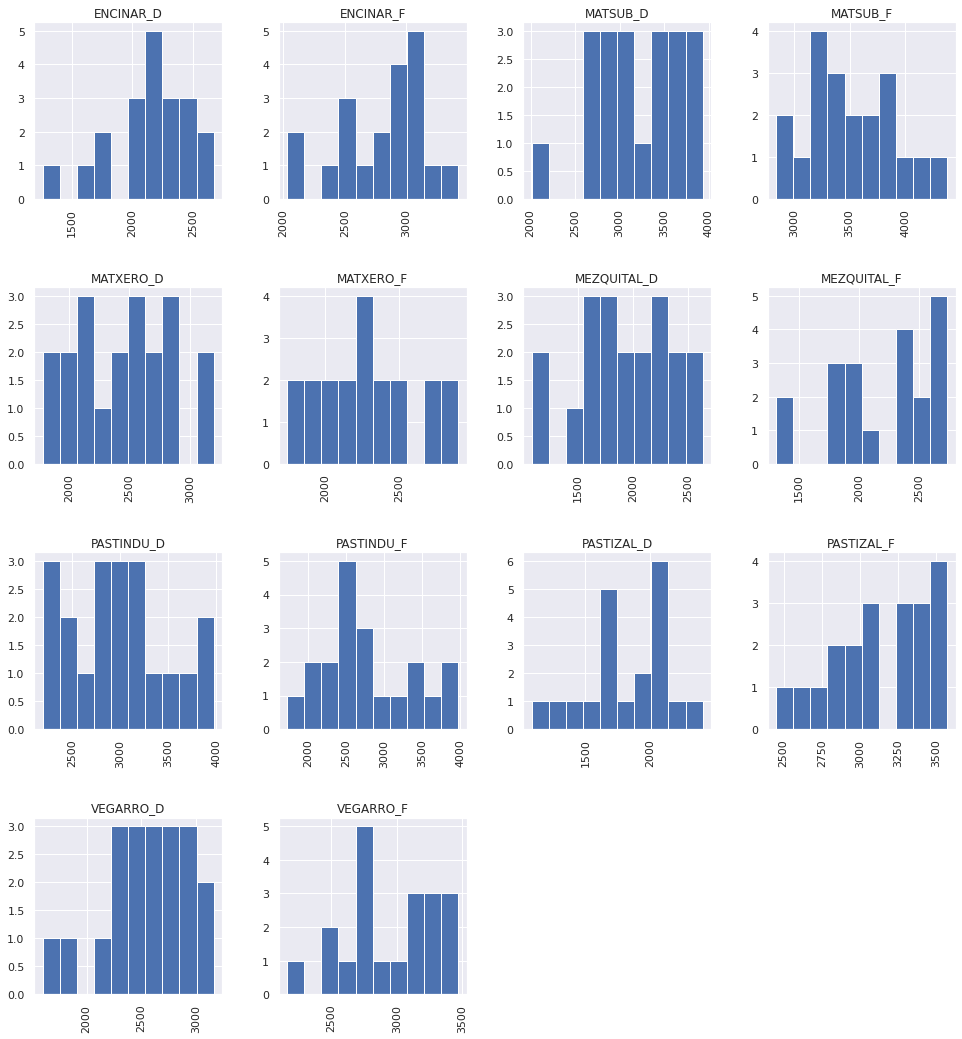

In [21]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['AMPLITUD']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

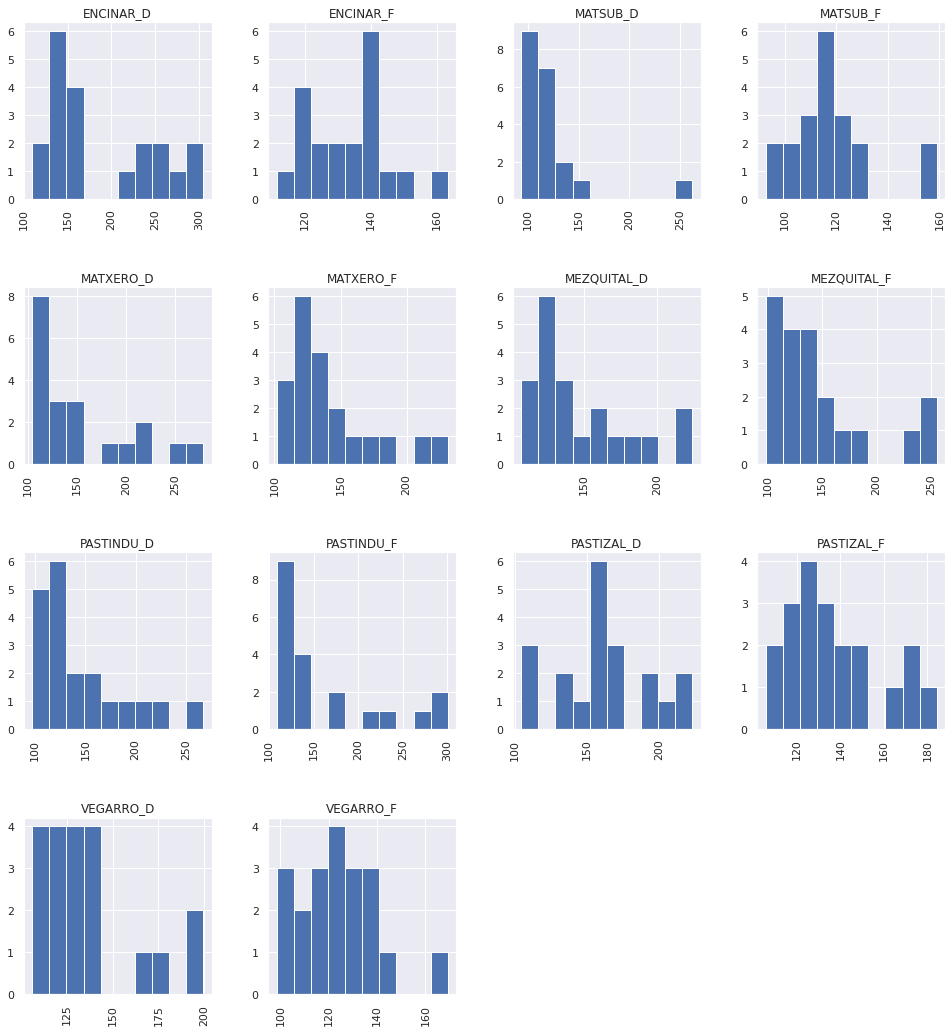

In [22]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['DURACION']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

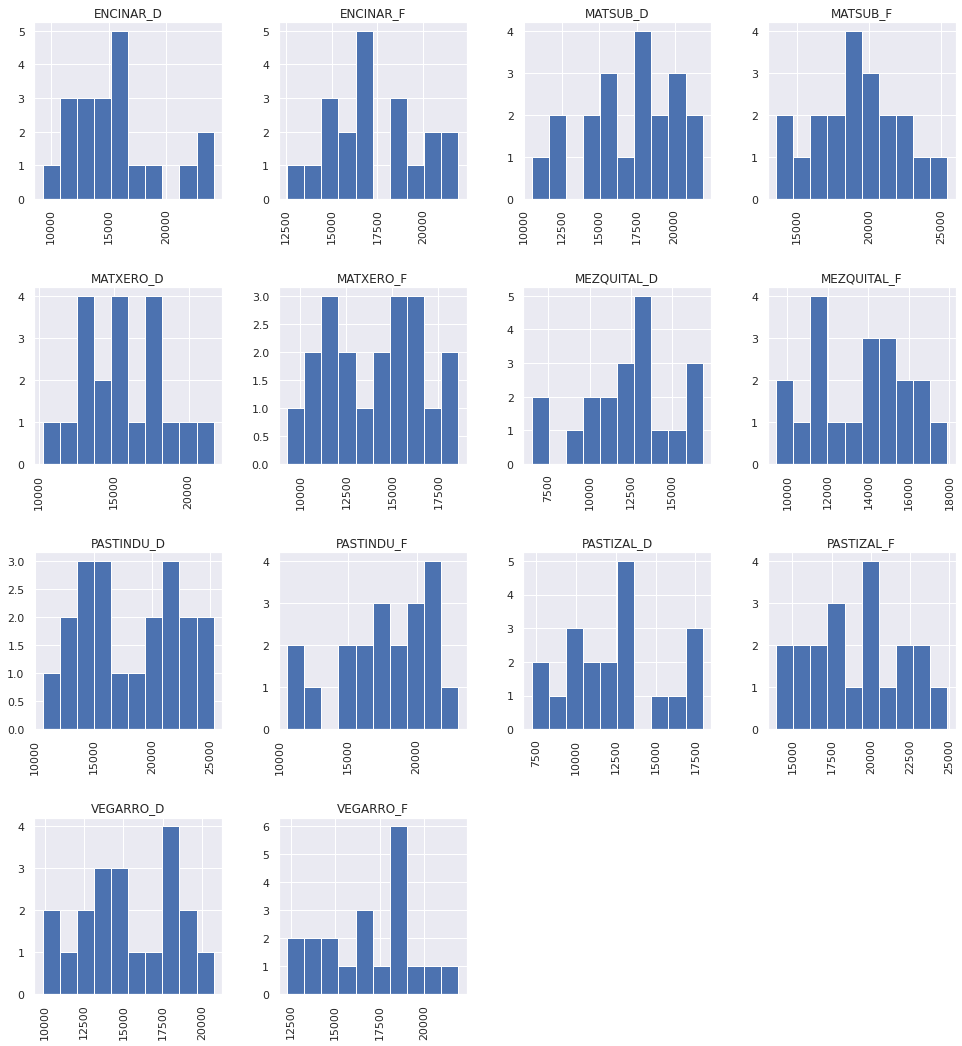

In [23]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['INTMEN']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

### Diagramas de Caja

#### Diagramas op1

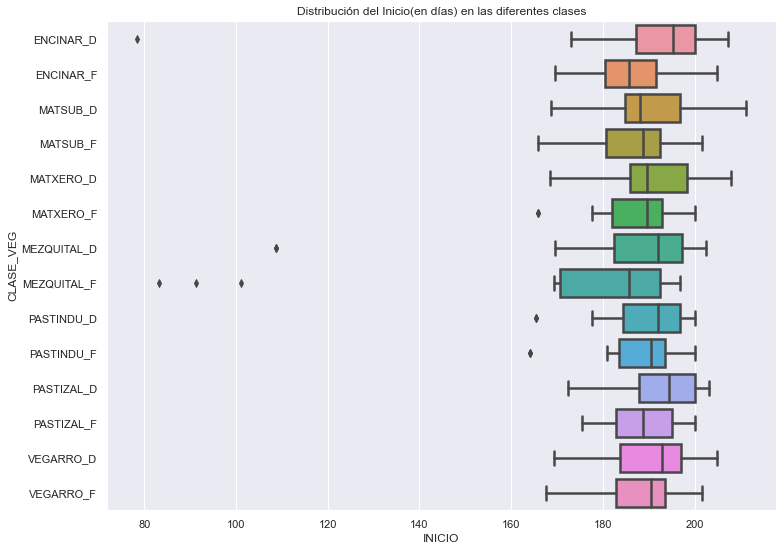

In [91]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(y="CLASE_VEG", x="INICIO", data=datos_evi, linewidth=2.5, orient= 'h')
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

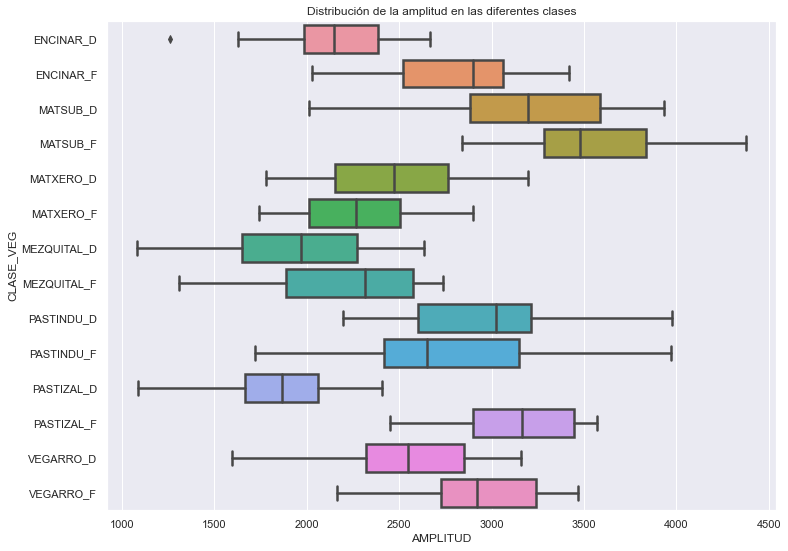

In [92]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(y="CLASE_VEG", x="AMPLITUD", data=datos_evi, linewidth=2.5, orient = 'h')
ax.set_title('Distribución de la amplitud en las diferentes clases');

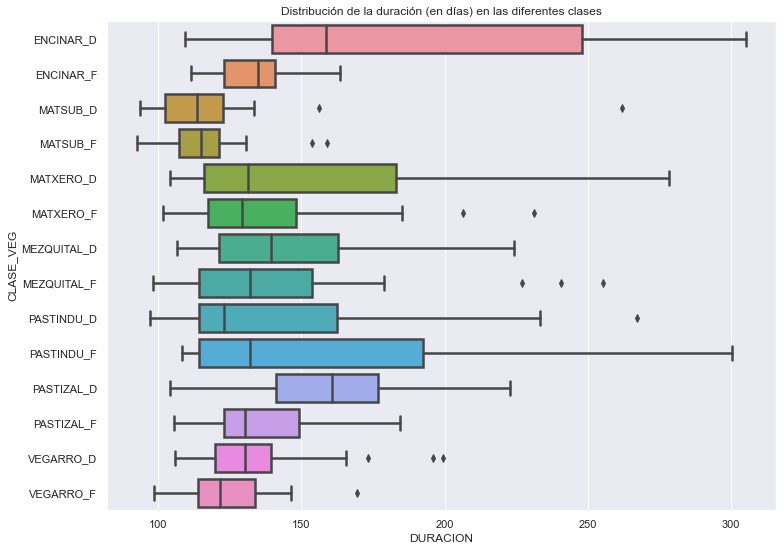

In [94]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(y="CLASE_VEG", x="DURACION", data=datos_evi, linewidth=2.5, orient ='h')
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

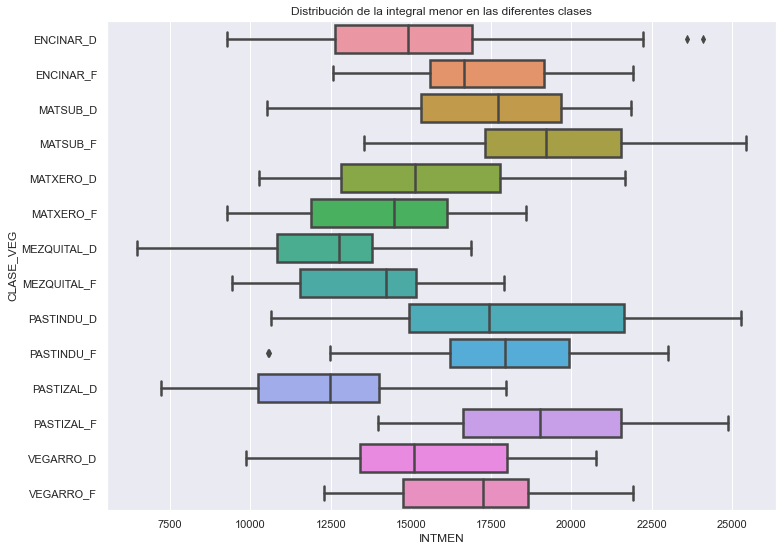

In [96]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(y="CLASE_VEG", x="INTMEN", data=datos_evi, linewidth=2.5, orient = 'h')
ax.set_title('Distribución de la integral menor en las diferentes clases');

#### Diagramas op2

Subplots de Boxplots para cada factor en los diferentes grupos

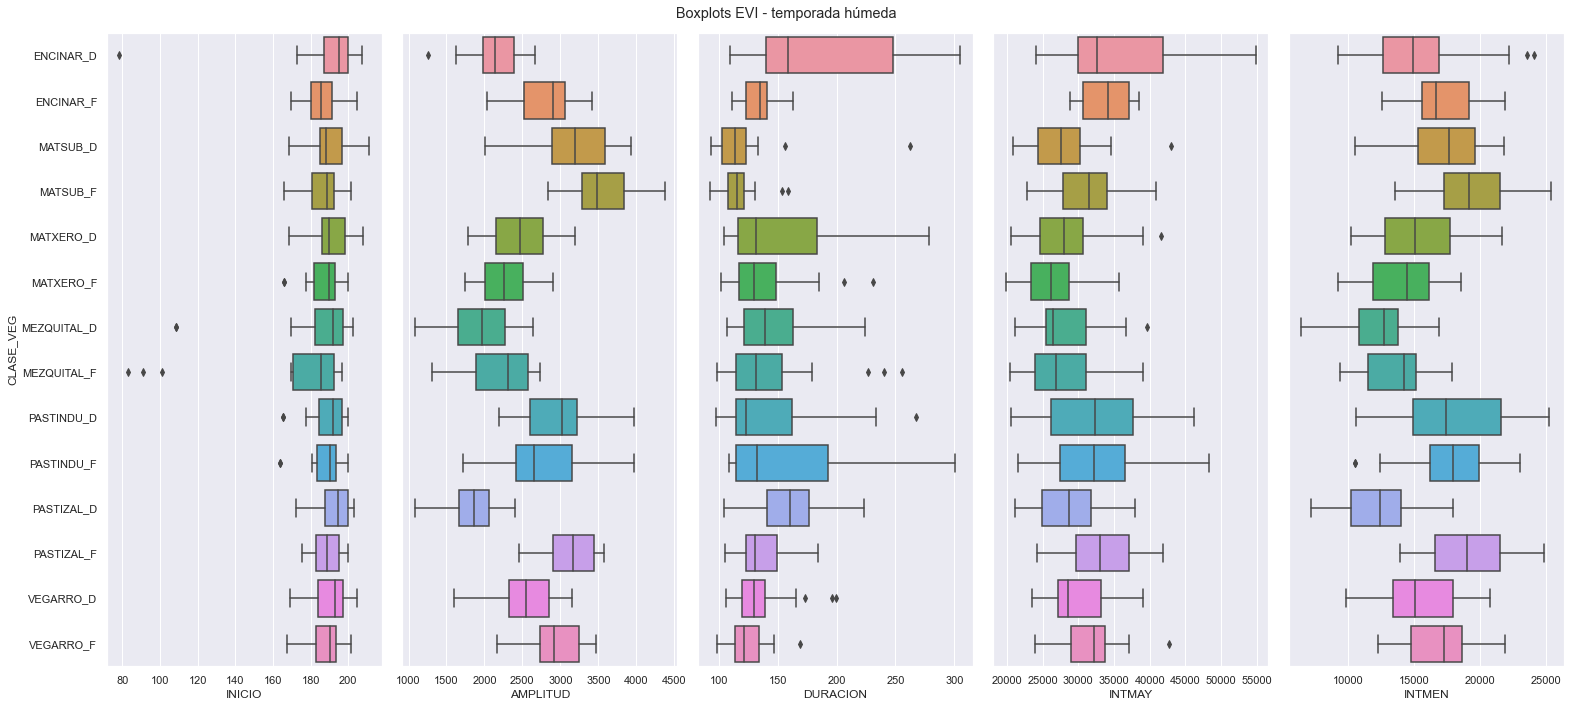

In [109]:
factores_evi = datos_evi.drop(columns=['CLASE_VEG', 'inicio', 'inicio - (X)', 'duracion']).columns.tolist()
fig_boxp, ax_boxp = plt.subplots(ncols = len(factores_evi) , nrows = 1, figsize= (22,10))
fig_boxp.suptitle('Boxplots EVI - temporada húmeda')
for i, clase in enumerate(factores_evi):
    sns.boxplot(data = datos_evi, 
                x = clase, 
                y = 'CLASE_VEG', 
                orient = 'h',
                ax = ax_boxp[i])
    if i >0:
        ax_boxp[i].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

### ANOVA

Supuestos:
*   Variable respuesta está normalmente distribuida (Shapiro Test, ya que el numero de muestras no permite apreciar el histograma)
*   Homogeneidad de varianzas en los k grupos

#### Pruebas de normalidad

In [61]:
from scipy import stats

def shapiro_prueba(data: pd.DataFrame, columna:str)->str:
    '''
    Función que realiza la prueba de Shapiro-Wilks para los valores de cada una de las categorías
    existentes en clase_veg, imprime los resultados de la prueba para un nivel de significancia del 0.05.
    @params:
        datos: Dataframe que contiene la columna CLASE_VEG con las diferentes categorias
        columna: Columna en la cual se desea realizar la prueba de Shapiro

        @return:
        shapiro_df: p-valor prueba de hipótesis por clase de vegatación 
    '''
    
    shapiro_df = pd.DataFrame(columns = ['p_value','Resultado'],index= data['CLASE_VEG'].unique().tolist())

    print(f'Prueba de Shapiro-Wilks para la columna {columna}')
    for clase_veg in data['CLASE_VEG'].unique():
        data_filtered = data[data['CLASE_VEG'] == clase_veg].copy()
        
        shapiro_test = stats.shapiro(data_filtered[columna])
        
        shapiro_df.loc[clase_veg,['p_value']] = shapiro_test.pvalue
        
        
        #print(f'Shapiro Test para CLASE_VEG = {clase_veg} : {shapiro_test}')
        if shapiro_test.pvalue < 0.05:
            #print('!!!!! Hay evidencia para rechazar Ho !!!')
            conc = 'Rezacho H0'
        else:
            conc = 'No Rechazo H0'
       # print('*'*30)
       
    shapiro_df.loc[:,'Resultado'] =   shapiro_df.apply(lambda s: 'No Rechazo H0' if s['p_value']>0.05 else 'Rechazo H0', axis = 1)
    
    return shapiro_df

In [62]:
shapiro_prueba(datos_evi, 'INICIO')

Prueba de Shapiro-Wilks para la columna INICIO


,p_value,Resultado
ENCINAR_D,8.85668e-07,Rechazo H0
ENCINAR_F,0.910054,No Rechazo H0
MATSUB_D,0.678787,No Rechazo H0
MATSUB_F,0.235656,No Rechazo H0
MATXERO_D,0.210422,No Rechazo H0
MATXERO_F,0.0768791,No Rechazo H0
MEZQUITAL_D,1.13081e-05,Rechazo H0
MEZQUITAL_F,1.13401e-05,Rechazo H0
PASTINDU_D,0.00910278,Rechazo H0
PASTINDU_F,0.0104985,Rechazo H0


In [123]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
test_norm_ini = pg.normality(data=datos_evi, dv='INICIO', group='CLASE_VEG')
test_norm_ini.columns = [column +'_Ini' for column in test_norm_ini.columns]

test_norm_Amp = pg.normality(data=datos_evi, dv='AMPLITUD', group='CLASE_VEG')
test_norm_Amp.columns = [column +'_Amp' for column in test_norm_Amp.columns]

test_norm_Dur = pg.normality(data=datos_evi, dv='DURACION', group='CLASE_VEG')
test_norm_Dur.columns = [column +'_Dur' for column in test_norm_Dur.columns]

test_norm_IntMen = pg.normality(data=datos_evi, dv='INTMEN', group='CLASE_VEG')
test_norm_IntMen.columns = [column +'_IMen' for column in test_norm_IntMen.columns]

test_norm_IntMay = pg.normality(data=datos_evi, dv='INTMAY', group='CLASE_VEG')
test_norm_IntMay.columns = [column +'_IMay' for column in test_norm_IntMay.columns]

In [125]:
test_norm_evi = pd.concat([test_norm_ini,test_norm_Amp,test_norm_Dur,test_norm_IntMen,test_norm_IntMay], axis = 1)
test_norm_evi

,W_Ini,pval_Ini,normal_Ini,W_Amp,pval_Amp,normal_Amp,W_Dur,pval_Dur,normal_Dur,W_IMen,pval_IMen,normal_IMen,W_IMay,pval_IMay,normal_IMay
ENCINAR_D,0.547715,8.856678e-07,False,0.958005,0.504804,True,0.883984,0.020881,False,0.932468,0.172243,True,0.915752,0.082105,True
ENCINAR_F,0.978283,9.100541e-01,True,0.949741,0.363173,True,0.964503,0.637149,True,0.968451,0.721882,True,0.908603,0.059949,True
MATSUB_D,0.966447,6.787869e-01,True,0.939740,0.237079,True,0.613258,0.000004,False,0.965593,0.660457,True,0.925782,0.128063,True
MATSUB_F,0.939602,2.356558e-01,True,0.976913,0.888342,True,0.887669,0.024372,False,0.991190,0.999210,True,0.986214,0.987993,True
MATXERO_D,0.937012,2.104215e-01,True,0.975406,0.862225,True,0.832578,0.002759,False,0.969918,0.753137,True,0.918603,0.093138,True
MATXERO_F,0.914262,7.687911e-02,True,0.971411,0.784362,True,0.841138,0.003800,False,0.961692,0.578176,True,0.936352,0.204411,True
MEZQUITAL_D,0.654118,1.130814e-05,False,0.961909,0.582656,True,0.880317,0.017926,False,0.968203,0.716569,True,0.924268,0.119741,True
MEZQUITAL_F,0.654227,1.134009e-05,False,0.926694,0.133357,True,0.824943,0.002085,False,0.958616,0.516590,True,0.945867,0.308670,True
PASTINDU_D,0.863646,9.102780e-03,False,0.957867,0.502174,True,0.838616,0.003456,False,0.951327,0.387676,True,0.955398,0.456468,True
PASTINDU_F,0.867210,1.049849e-02,False,0.962803,0.601242,True,0.789500,0.000605,False,0.936557,0.206258,True,0.955796,0.463644,True


#### Pruebas de Homogeneidad de Varianzas

In [67]:
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


Método Levene

In [147]:
# Test de homocedasticidad / levene
factors_list = ['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']
homo_test_levene = pd.concat([pg.homoscedasticity(data = datos_evi, dv = col, group='CLASE_VEG', method = 'levene') for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
homo_test_levene

,,W,pval,equal_var
INICIO,levene,1.601126,0.084538,True
AMPLITUD,levene,1.552814,0.098878,True
DURACION,levene,3.457500,0.000057,False
INTMEN,levene,1.144907,0.321351,True


Método Bartlett

In [148]:
homo_test_bart = pd.concat([pg.homoscedasticity(data = datos_evi, dv = col, group='CLASE_VEG', method = 'bartlett') for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
homo_test_bart

,,T,pval,equal_var
INICIO,bartlett,145.510805,1.649666e-24,False
AMPLITUD,bartlett,18.899502,1.262527e-01,True
DURACION,bartlett,104.113534,2.635611e-16,False
INTMEN,bartlett,13.664892,3.978599e-01,True


### ANOVA

In [151]:
# One Way ANOVA
ANOVA_Evi = pd.concat([pg.anova(data = datos_evi, dv = col, between='CLASE_VEG', detailed=True) for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
ANOVA_Evi

Source            SS   DF            MS          F  \
INICIO   0  CLASE_VEG  6.194966e+03   13  4.765359e+02   1.749349   
         1     Within  7.246042e+04  266  2.724076e+02        NaN   
AMPLITUD 0  CLASE_VEG  6.765550e+07   13  5.204269e+06  29.078025   
         1     Within  4.760762e+07  266  1.789760e+05        NaN   
DURACION 0  CLASE_VEG  9.116595e+04   13  7.012765e+03   4.493532   
         1     Within  4.151290e+05  266  1.560635e+03        NaN   
INTMEN   0  CLASE_VEG  1.354379e+09   13  1.041830e+08  10.610843   
         1     Within  2.611733e+09  266  9.818544e+06        NaN   

                   p-unc       np2  
INICIO   0  5.135296e-02  0.078761  
         1           NaN       NaN  
AMPLITUD 0  8.823752e-44  0.586966  
         1           NaN       NaN  
DURACION 0  6.352825e-07  0.180065  
         1           NaN       NaN  
INTMEN   0  4.142343e-18  0.341488  
         1           NaN       NaN

Las pruebas de hipótesis de las ANOVAS realizadas por cada variable con el objetivo de comparar las medias de los diferentes grupos arrojaron los siguientes resultados:
*  Para la variable `INICIO`: NO HAY EVIDENCIA PARA RECHAZAR $H_{0}$: $\mu_{0}$ = $\mu_{1}$ ... = $\mu_{k}$ con un nivel de significacia $\alpha$ = 0.05
*  Para el resto de variables: `AMPLITUD`, `DURACIÓN`, `INTEGRAL MENOR` se rechaza $H_{0}$

Al no tener evidencia para rechazar $H_{0}$ se dice que otras variables explicativas (variabilidad debida a diferentes niveles del factor/grupos/efecto del tratamiento)  introducen un efecto en las medias de la amplitud, duración e integral (no existen diferencias significativas entre las medias de las variables en los diferentes grupos)

NOTA: La diferencia entre medias se detecta a través de estudio de la varianza entre grupos y dentro de grupos. 
No hay evidencia de diferencias en las medias de los diferentes grupos por efectos del tratamiento

### Prueba Post-Hoc

#### Duración

In [153]:
tukey_results_D = pg.pairwise_tukey(data=datos_evi, dv='DURACION', between='CLASE_VEG')
tukey_results_D

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,ENCINAR_D,ENCINAR_F,187.6432,133.4392,54.2040,12.492539,4.338910,0.001642,1.344824
1,ENCINAR_D,MATSUB_D,187.6432,120.4032,67.2400,12.492539,5.382413,0.001000,1.668252
2,ENCINAR_D,MATSUB_F,187.6432,117.4232,70.2200,12.492539,5.620955,0.001000,1.742187
3,ENCINAR_D,MATXERO_D,187.6432,153.9768,33.6664,12.492539,2.694921,0.288273,0.835277
4,ENCINAR_D,MATXERO_F,187.6432,140.7792,46.8640,12.492539,3.751359,0.015206,1.162715
...,...,...,...,...,...,...,...,...,...
86,PASTIZAL_D,VEGARRO_D,161.2272,136.2800,24.9472,12.492539,1.996968,0.739348,0.618950
87,PASTIZAL_D,VEGARRO_F,161.2272,123.7344,37.4928,12.492539,3.001215,0.144220,0.930212
88,PASTIZAL_F,VEGARRO_D,137.2688,136.2800,0.9888,12.492539,0.079151,0.900000,0.024533
89,PASTIZAL_F,VEGARRO_F,137.2688,123.7344,13.5344,12.492539,1.083399,0.900000,0.335794


In [154]:
#Filtramos los que no pasaron la prueba con un nivel de significancia del 5%
tukey_results_D[tukey_results_D['p-tukey'] < 0.05]

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,ENCINAR_D,ENCINAR_F,187.6432,133.4392,54.2040,12.492539,4.338910,0.001642,1.344824
1,ENCINAR_D,MATSUB_D,187.6432,120.4032,67.2400,12.492539,5.382413,0.001000,1.668252
2,ENCINAR_D,MATSUB_F,187.6432,117.4232,70.2200,12.492539,5.620955,0.001000,1.742187
4,ENCINAR_D,MATXERO_F,187.6432,140.7792,46.8640,12.492539,3.751359,0.015206,1.162715
7,ENCINAR_D,PASTINDU_D,187.6432,144.7928,42.8504,12.492539,3.430079,0.043673,1.063136
10,ENCINAR_D,PASTIZAL_F,187.6432,137.2688,50.3744,12.492539,4.032359,0.005480,1.249810
11,ENCINAR_D,VEGARRO_D,187.6432,136.2800,51.3632,12.492539,4.111510,0.004049,1.274342
12,ENCINAR_D,VEGARRO_F,187.6432,123.7344,63.9088,12.492539,5.115757,0.001000,1.585604
41,MATSUB_F,PASTINDU_F,117.4232,162.5352,-45.1120,12.492539,-3.611115,0.024444,-1.119248
42,MATSUB_F,PASTIZAL_D,117.4232,161.2272,-43.8040,12.492539,-3.506413,0.034393,-1.086795


In [155]:
#Filtramos los que  pasaron la prueba con un nivel de significancia del 5%
tukey_results_D[tukey_results_D['p-tukey'] > 0.05]

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
3,ENCINAR_D,MATXERO_D,187.6432,153.9768,33.6664,12.492539,2.694921,0.288273,0.835277
5,ENCINAR_D,MEZQUITAL_D,187.6432,147.3256,40.3176,12.492539,3.227334,0.079794,1.000296
6,ENCINAR_D,MEZQUITAL_F,187.6432,145.5240,42.1192,12.492539,3.371548,0.052138,1.044995
8,ENCINAR_D,PASTINDU_F,187.6432,162.5352,25.1080,12.492539,2.009840,0.731240,0.622940
9,ENCINAR_D,PASTIZAL_D,187.6432,161.2272,26.4160,12.492539,2.114542,0.665295,0.655392
...,...,...,...,...,...,...,...,...,...
86,PASTIZAL_D,VEGARRO_D,161.2272,136.2800,24.9472,12.492539,1.996968,0.739348,0.618950
87,PASTIZAL_D,VEGARRO_F,161.2272,123.7344,37.4928,12.492539,3.001215,0.144220,0.930212
88,PASTIZAL_F,VEGARRO_D,137.2688,136.2800,0.9888,12.492539,0.079151,0.900000,0.024533
89,PASTIZAL_F,VEGARRO_F,137.2688,123.7344,13.5344,12.492539,1.083399,0.900000,0.335794


Prueba de Tukey Dentro - Fuera EVI

In [184]:
Dentro = [col for col in tukey_results_D['A'].unique() if col.find('_D') != -1]
Fuera = [col for col in tukey_results_D['A'].unique() if col.find('_F') != -1]

### Post hoc dunn

In [168]:
kruskal_test_evi = pd.concat([pg.kruskal(data = datos_evi, dv = col, between='CLASE_VEG',) for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
kruskal_test_evi

,,Source,ddof1,H,p-unc
INICIO,Kruskal,CLASE_VEG,13,14.858929,3.162421e-01
AMPLITUD,Kruskal,CLASE_VEG,13,169.279156,2.586673e-29
DURACION,Kruskal,CLASE_VEG,13,53.550200,7.246973e-07
INTMEN,Kruskal,CLASE_VEG,13,94.273554,2.116381e-14


INICIO

In [178]:
posthoc_dunn_evi_ini = sp.posthoc_dunn(a = datos_evi, val_col=factors_list[0], group_col='CLASE_VEG')
posthoc_dunn_evi_ini
# Return P-values

,ENCINAR_D,ENCINAR_F,MATSUB_D,MATSUB_F,MATXERO_D,MATXERO_F,MEZQUITAL_D,MEZQUITAL_F,PASTINDU_D,PASTINDU_F,PASTIZAL_D,PASTIZAL_F,VEGARRO_D,VEGARRO_F
ENCINAR_D,1.000000,0.047281,0.145373,0.066182,0.364477,0.102275,0.190701,0.005192,0.251676,0.155065,0.862676,0.143492,0.391969,0.142958
ENCINAR_F,0.047281,1.000000,0.597705,0.883460,0.281523,0.726453,0.499508,0.417309,0.402320,0.574180,0.031026,0.602463,0.259438,0.603825
MATSUB_D,0.145373,0.597705,1.000000,0.703115,0.582867,0.858836,0.882689,0.180635,0.756727,0.972715,0.103305,0.994542,0.548494,0.992983
MATSUB_F,0.066182,0.883460,0.703115,1.000000,0.352205,0.838929,0.597027,0.338222,0.489628,0.677906,0.044414,0.708197,0.326525,0.709652
MATXERO_D,0.364477,0.281523,0.582867,0.352205,1.000000,0.467191,0.687948,0.059025,0.810779,0.606554,0.280215,0.578182,0.959472,0.576846
MATXERO_F,0.102275,0.726453,0.858836,0.838929,0.467191,1.000000,0.744866,0.245664,0.625807,0.832061,0.070779,0.864212,0.436644,0.865749
MEZQUITAL_D,0.190701,0.499508,0.882689,0.597027,0.687948,0.744866,1.000000,0.137183,0.871133,0.909746,0.138479,0.877293,0.650940,0.875752
MEZQUITAL_F,0.005192,0.417309,0.180635,0.338222,0.059025,0.245664,0.137183,1.000000,0.099233,0.169751,0.002999,0.182873,0.052523,0.183516
PASTINDU_D,0.251676,0.402320,0.756727,0.489628,0.810779,0.625807,0.871133,0.099233,1.000000,0.782872,0.187083,0.751531,0.771635,0.750048
PASTINDU_F,0.155065,0.574180,0.972715,0.677906,0.606554,0.832061,0.909746,0.169751,0.782872,1.000000,0.110749,0.967261,0.571520,0.965703


In [185]:
posthoc_dunn_evi_ini.loc[Dentro, Fuera]

,ENCINAR_F,MATSUB_F,MATXERO_F,MEZQUITAL_F,PASTINDU_F,PASTIZAL_F
ENCINAR_D,0.047281,0.066182,0.102275,0.005192,0.155065,0.143492
MATSUB_D,0.597705,0.703115,0.858836,0.180635,0.972715,0.994542
MATXERO_D,0.281523,0.352205,0.467191,0.059025,0.606554,0.578182
MEZQUITAL_D,0.499508,0.597027,0.744866,0.137183,0.909746,0.877293
PASTINDU_D,0.402320,0.489628,0.625807,0.099233,0.782872,0.751531
PASTIZAL_D,0.031026,0.044414,0.070779,0.002999,0.110749,0.101865
VEGARRO_D,0.259438,0.326525,0.436644,0.052523,0.571520,0.543945


H0 
Se Rechaza:
* ENCINAR

No se rechaza:
* MATSUB
* MATXERO
* MEZQUITAL
* PASTINDU

No hay evidencia para rechazar H0 de que Pertecenen a la misma distribución.

AMPLITUD

In [179]:
posthoc_dunn_evi_amp = sp.posthoc_dunn(a = datos_evi, val_col=factors_list[1], group_col='CLASE_VEG')
posthoc_dunn_evi_amp

,ENCINAR_D,ENCINAR_F,MATSUB_D,MATSUB_F,MATXERO_D,MATXERO_F,MEZQUITAL_D,MEZQUITAL_F,PASTINDU_D,PASTINDU_F,PASTIZAL_D,PASTIZAL_F,VEGARRO_D,VEGARRO_F
ENCINAR_D,1.000000e+00,1.505644e-04,3.348631e-08,2.175076e-11,8.680576e-02,4.616349e-01,4.887977e-01,6.660754e-01,9.396550e-06,0.001434,1.577268e-01,6.623671e-08,0.024297,6.891767e-06
ENCINAR_F,1.505644e-04,1.000000e+00,8.326996e-02,3.688714e-03,3.774223e-02,2.258277e-03,7.382241e-06,7.833946e-04,5.218629e-01,0.546908,1.962077e-07,1.071896e-01,0.124115,4.796489e-01
MATSUB_D,3.348631e-08,8.326996e-02,1.000000e+00,2.413564e-01,1.391561e-04,1.701384e-06,5.152794e-10,3.569014e-07,2.750337e-01,0.019574,4.064646e-12,9.036390e-01,0.001076,3.052910e-01
MATSUB_F,2.175076e-11,3.688714e-03,2.413564e-01,1.000000e+00,6.316939e-07,2.559646e-09,1.513316e-13,3.795356e-10,2.362662e-02,0.000455,5.209074e-16,1.961256e-01,0.000009,2.803786e-02
MATXERO_D,8.680576e-02,3.774223e-02,1.391561e-04,6.316939e-07,1.000000e+00,3.288979e-01,1.618505e-02,2.002102e-01,6.565408e-03,0.140147,1.776529e-03,2.254934e-04,0.589256,5.360858e-03
MATXERO_F,4.616349e-01,2.258277e-03,1.701384e-06,2.559646e-09,3.288979e-01,1.000000e+00,1.531826e-01,7.606580e-01,2.203582e-04,0.014223,3.164108e-02,3.087163e-06,0.129456,1.693392e-04
MEZQUITAL_D,4.887977e-01,7.382241e-06,5.152794e-10,1.513316e-13,1.618505e-02,1.531826e-01,1.000000e+00,2.611136e-01,3.009749e-07,0.000104,4.711950e-01,1.105971e-09,0.003233,2.111696e-07
MEZQUITAL_F,6.660754e-01,7.833946e-04,3.569014e-07,3.795356e-10,2.002102e-01,7.606580e-01,2.611136e-01,1.000000e+00,6.359116e-05,0.005848,6.513959e-02,6.710821e-07,0.068627,4.793709e-05
PASTINDU_D,9.396550e-06,5.218629e-01,2.750337e-01,2.362662e-02,6.565408e-03,2.203582e-04,3.009749e-07,6.359116e-05,1.000000e+00,0.213914,5.115475e-09,3.318082e-01,0.029391,9.470667e-01
PASTINDU_F,1.433907e-03,5.469083e-01,1.957376e-02,4.548560e-04,1.401470e-01,1.422306e-02,1.044738e-04,5.847780e-03,2.139136e-01,1.000000,4.214867e-06,2.687325e-02,0.349618,1.904440e-01


In [186]:
posthoc_dunn_evi_amp.loc[Dentro, Fuera]

,ENCINAR_F,MATSUB_F,MATXERO_F,MEZQUITAL_F,PASTINDU_F,PASTIZAL_F
ENCINAR_D,1.505644e-04,2.175076e-11,0.461635,6.660754e-01,0.001434,6.623671e-08
MATSUB_D,8.326996e-02,2.413564e-01,0.000002,3.569014e-07,0.019574,9.036390e-01
MATXERO_D,3.774223e-02,6.316939e-07,0.328898,2.002102e-01,0.140147,2.254934e-04
MEZQUITAL_D,7.382241e-06,1.513316e-13,0.153183,2.611136e-01,0.000104,1.105971e-09
PASTINDU_D,5.218629e-01,2.362662e-02,0.000220,6.359116e-05,0.213914,3.318082e-01
PASTIZAL_D,1.962077e-07,5.209074e-16,0.031641,6.513959e-02,0.000004,9.502103e-12
VEGARRO_D,1.241148e-01,8.939505e-06,0.129456,6.862710e-02,0.349618,1.640075e-03


H0 
Se Rechaza:
* ENCINAR
* PASTIZAL

No se rechaza:
* MATSUB
* MATXERO
* MEZQUITAL
* PASTINDU

No hay evidencia para rechazar H0 de que Pertecenen a la misma distribución.

DURACION

In [180]:
posthoc_dunn_evi_dur = sp.posthoc_dunn(a = datos_evi, val_col=factors_list[2], group_col='CLASE_VEG')
posthoc_dunn_evi_dur

,ENCINAR_D,ENCINAR_F,MATSUB_D,MATSUB_F,MATXERO_D,MATXERO_F,MEZQUITAL_D,MEZQUITAL_F,PASTINDU_D,PASTINDU_F,PASTIZAL_D,PASTIZAL_F,VEGARRO_D,VEGARRO_F
ENCINAR_D,1.000000e+00,0.020195,1.832391e-07,4.142302e-07,0.033303,0.010587,0.066142,0.008656,0.004971,0.039767,0.530786,0.019779,0.006722,0.000068
ENCINAR_F,2.019517e-02,1.000000,3.817248e-03,6.151452e-03,0.845948,0.815494,0.627507,0.762146,0.626815,0.789824,0.089906,0.993768,0.698308,0.096961
MATSUB_D,1.832391e-07,0.003817,1.000000e+00,8.781738e-01,0.002021,0.007825,0.000730,0.009592,0.016099,0.001581,0.000004,0.003913,0.012236,0.217534
MATSUB_F,4.142302e-07,0.006151,8.781738e-01,1.000000e+00,0.003347,0.012202,0.001260,0.014812,0.024235,0.002646,0.000009,0.006299,0.018673,0.280219
MATXERO_D,3.330300e-02,0.845948,2.020702e-03,3.347450e-03,1.000000,0.668917,0.771091,0.619221,0.496184,0.942404,0.133199,0.839837,0.560637,0.063730
MATXERO_F,1.058691e-02,0.815494,7.824797e-03,1.220183e-02,0.668917,1.000000,0.472398,0.944735,0.800368,0.617157,0.053701,0.821564,0.877404,0.153745
MEZQUITAL_D,6.614153e-02,0.627507,7.298307e-04,1.260449e-03,0.771091,0.472398,1.000000,0.430754,0.331322,0.826884,0.226027,0.621978,0.382748,0.031952
MEZQUITAL_F,8.655588e-03,0.762146,9.591520e-03,1.481241e-02,0.619221,0.944735,0.430754,1.000000,0.854366,0.569218,0.045656,0.768106,0.932308,0.174747
PASTINDU_D,4.970846e-03,0.626815,1.609885e-02,2.423506e-02,0.496184,0.800368,0.331322,0.854366,1.000000,0.451597,0.029101,0.632362,0.921448,0.240573
PASTINDU_F,3.976686e-02,0.789824,1.580827e-03,2.645899e-03,0.942404,0.617157,0.826884,0.569218,0.451597,1.000000,0.152902,0.783815,0.513019,0.054066


In [187]:
posthoc_dunn_evi_dur.loc[Dentro, Fuera]

,ENCINAR_F,MATSUB_F,MATXERO_F,MEZQUITAL_F,PASTINDU_F,PASTIZAL_F
ENCINAR_D,0.020195,4.142302e-07,0.010587,0.008656,0.039767,0.019779
MATSUB_D,0.003817,8.781738e-01,0.007825,0.009592,0.001581,0.003913
MATXERO_D,0.845948,3.347450e-03,0.668917,0.619221,0.942404,0.839837
MEZQUITAL_D,0.627507,1.260449e-03,0.472398,0.430754,0.826884,0.621978
PASTINDU_D,0.626815,2.423506e-02,0.800368,0.854366,0.451597,0.632362
PASTIZAL_D,0.089906,9.186230e-06,0.053701,0.045656,0.152902,0.088436
VEGARRO_D,0.698308,1.867317e-02,0.877404,0.932308,0.513019,0.704098


H0 
Se Rechaza:
* ENCINAR


No se rechaza:
* MATSUB
* MATXERO
* MEZQUITAL
* PASTINDU
* PASTIZAL

No hay evidencia para rechazar H0 de que Pertecenen a la misma distribución.

INTEGRAL MENOR

In [181]:
posthoc_dunn_evi_im = sp.posthoc_dunn(a = datos_evi, val_col=factors_list[3], group_col='CLASE_VEG')
posthoc_dunn_evi_im

,ENCINAR_D,ENCINAR_F,MATSUB_D,MATSUB_F,MATXERO_D,MATXERO_F,MEZQUITAL_D,MEZQUITAL_F,PASTINDU_D,PASTINDU_F,PASTIZAL_D,PASTIZAL_F,VEGARRO_D,VEGARRO_F
ENCINAR_D,1.000000,0.080865,0.108903,1.299663e-03,0.912925,0.243322,1.575762e-02,9.366561e-02,0.033303,0.045974,1.891945e-02,2.378689e-03,0.993768,0.144931
ENCINAR_F,0.080865,1.000000,0.886649,1.414633e-01,0.101768,0.003586,3.180079e-05,6.214830e-04,0.701924,0.802632,4.261864e-05,1.961251e-01,0.079516,0.773332
MATSUB_D,0.108903,0.886649,1.000000,1.067643e-01,0.135229,0.005608,5.878718e-05,1.039853e-03,0.599396,0.694698,7.806646e-05,1.512257e-01,0.107189,0.884336
MATSUB_F,0.001300,0.141463,0.106764,1.000000e+00,0.001892,0.000012,1.796508e-08,9.960115e-07,0.276754,0.222305,2.649200e-08,8.589638e-01,0.001265,0.078682
MATXERO_D,0.912925,0.101768,0.135229,1.891854e-03,1.000000,0.201930,1.160836e-02,7.414454e-02,0.043480,0.059257,1.403119e-02,3.400423e-03,0.906733,0.177555
MATXERO_F,0.243322,0.003586,0.005608,1.171761e-05,0.201930,1.000000,2.121194e-01,6.102981e-01,0.000984,0.001565,2.378446e-01,2.609857e-05,0.246492,0.008680
MEZQUITAL_D,0.015758,0.000032,0.000059,1.796508e-08,0.011608,0.212119,1.000000e+00,4.604471e-01,0.000006,0.000010,9.462893e-01,4.957102e-08,0.016099,0.000108
MEZQUITAL_F,0.093666,0.000621,0.001040,9.960115e-07,0.074145,0.610298,4.604471e-01,1.000000e+00,0.000142,0.000241,5.023839e-01,2.420297e-06,0.095205,0.001724
PASTINDU_D,0.033303,0.701924,0.599396,2.767543e-01,0.043480,0.000984,5.548658e-06,1.419272e-04,1.000000,0.894366,7.622237e-06,3.628509e-01,0.032661,0.502384
PASTINDU_F,0.045974,0.802632,0.694698,2.223052e-01,0.059257,0.001565,1.033160e-05,2.406563e-04,0.894366,1.000000,1.407121e-05,2.970743e-01,0.045130,0.590603


In [189]:
posthoc_dunn_evi_im.loc[Dentro, Fuera]

,ENCINAR_F,MATSUB_F,MATXERO_F,MEZQUITAL_F,PASTINDU_F,PASTIZAL_F
ENCINAR_D,0.080865,1.299663e-03,0.243322,0.093666,0.045974,2.378689e-03
MATSUB_D,0.886649,1.067643e-01,0.005608,0.001040,0.694698,1.512257e-01
MATXERO_D,0.101768,1.891854e-03,0.201930,0.074145,0.059257,3.400423e-03
MEZQUITAL_D,0.000032,1.796508e-08,0.212119,0.460447,0.000010,4.957102e-08
PASTINDU_D,0.701924,2.767543e-01,0.000984,0.000142,0.894366,3.628509e-01
PASTIZAL_D,0.000043,2.649200e-08,0.237845,0.502384,0.000014,7.225355e-08
VEGARRO_D,0.079516,1.264731e-03,0.246492,0.095205,0.045130,2.317756e-03


H0 
Se Rechaza:
* PASTIZAL

No se rechaza:
* ENCINAR
* MATSUB
* MATXERO
* MEZQUITAL
* PASTINDU

No hay evidencia para rechazar H0 de que Pertecenen a la misma distribución.

## Explorando datos NDVI (variables fenologicas)

### Exploracion inicial

In [192]:
#Observamos los 5 primeros registros de los datos
datos_ndvi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,11.09,0,177.44,3145,14.41,230.56,70050,33880
1,ENCINAR_D,34.09,23,177.44,3019,18.90,302.40,89970,42230
2,ENCINAR_D,57.69,46,187.04,2814,17.88,286.08,79660,33570
3,ENCINAR_D,81.90,69,206.40,3614,17.36,277.76,83110,39800
4,ENCINAR_D,104.60,92,201.60,2878,18.26,292.16,81110,36720


In [194]:
datos_ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CLASE_VEG     280 non-null    object 
 1   inicio        280 non-null    float64
 2   inicio - (X)  280 non-null    int64  
 3   INICIO        280 non-null    float64
 4   AMPLITUD      280 non-null    int64  
 5   duracion      280 non-null    float64
 6   DURACION      280 non-null    float64
 7   INTMAY        280 non-null    int64  
 8   INTMEN        280 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 19.8+ KB


In [ ]:
#Analizando dimensiones del Dataset
print("Dimensiones del Dataset:")
print("-" * 25)
print(f"Registros: {datos_ndvi.shape[0]}")
print(f"Columnas: {datos_ndvi.shape[1]}")
print("-" * 25)

Dimensiones del Dataset:
-------------------------
Registros: 280
Columnas: 9
-------------------------


In [ ]:
#Cambiando tipo de datos
datos_ndvi['CLASE_VEG'] = datos_ndvi['CLASE_VEG'].astype('category')
datos_ndvi.dtypes

CLASE_VEG       category
inicio           float64
inicio - (X)       int64
INICIO           float64
AMPLITUD           int64
duracion         float64
DURACION         float64
INTMAY             int64
INTMEN             int64
dtype: object

In [ ]:
#Observando valores perdidos
datos_ndvi.isnull().sum()

CLASE_VEG       0
inicio          0
inicio - (X)    0
INICIO          0
AMPLITUD        0
duracion        0
DURACION        0
INTMAY          0
INTMEN          0
dtype: int64

In [ ]:
duplicate_rows_df = datos_ndvi[datos_ndvi.duplicated()]
duplicate_rows_df.shape
print(f'Numero de registros duplicados: {duplicate_rows_df.shape[0]}')

Numero de registros duplicados: 0


In [ ]:
#Renombrando columnas
datos_ndvi = datos_ndvi.rename(columns={'AMPLITUD ': 'AMPLITUD'})

### EDA 

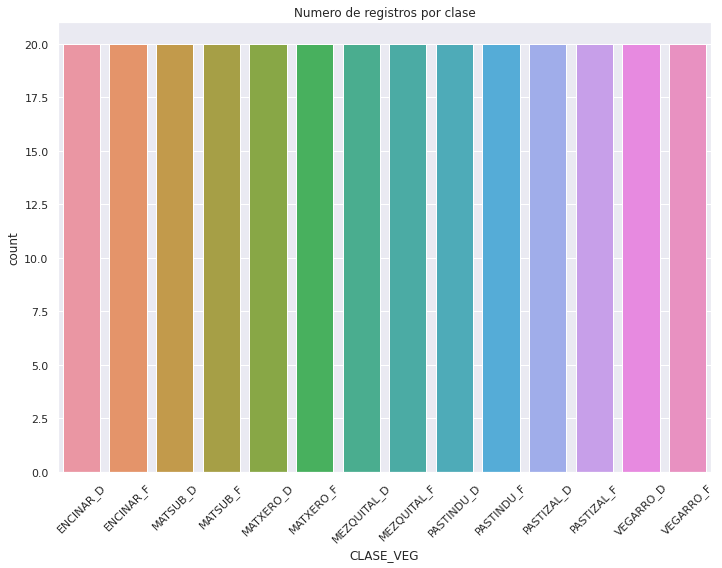

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = datos_ndvi, x = 'CLASE_VEG')
plt.title('Numero de registros por clase')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Veremos la media, minima y maxima de algunas caracteristicas
datos_ndvi[["CLASE_VEG", "INICIO", "AMPLITUD", "DURACION", "INTMEN"]].groupby('CLASE_VEG').agg(['mean','min', 'max', 'std'])

INICIO                 ... INTMEN                     
                mean     min    max  ...    min    max           std
CLASE_VEG                            ...                            
ENCINAR_D    193.896  177.44  206.4  ...  24120  59900   8444.620757
ENCINAR_F    188.624  176.00  203.2  ...  36470  66540   7407.150102
MATSUB_D     188.416  168.00  211.2  ...  27090  67600  11677.159487
MATSUB_F     185.872  165.76  200.0  ...  32490  63830   8878.432709
MATXERO_D    189.632  167.68  209.6  ...  20100  47990   6906.440530
MATXERO_F    186.880  165.12  200.0  ...  22780  43920   5468.167595
MEZQUITAL_D  191.240  169.76  201.6  ...  16990  40170   5766.760903
MEZQUITAL_F  184.904   92.80  203.2  ...  14840  33050   4799.625287
PASTINDU_D   187.992  164.96  201.6  ...  25920  56590   7400.789503
PASTINDU_F   187.288  164.48  201.6  ...  26500  45320   4626.430334
PASTIZAL_D   192.288  172.96  203.2  ...  17300  43170   6261.112731
PASTIZAL_F   187.904  175.52  200.0  ...  27590  49310   6090.795990
VEGARRO_D    190.232  168.64  209.6  ...  25180  53680   6455.855665
VEGARRO_F    187.400  167.04  203.2  ...  31200  57870   6726.309616

[14 rows x 16 columns]

### Histogramas

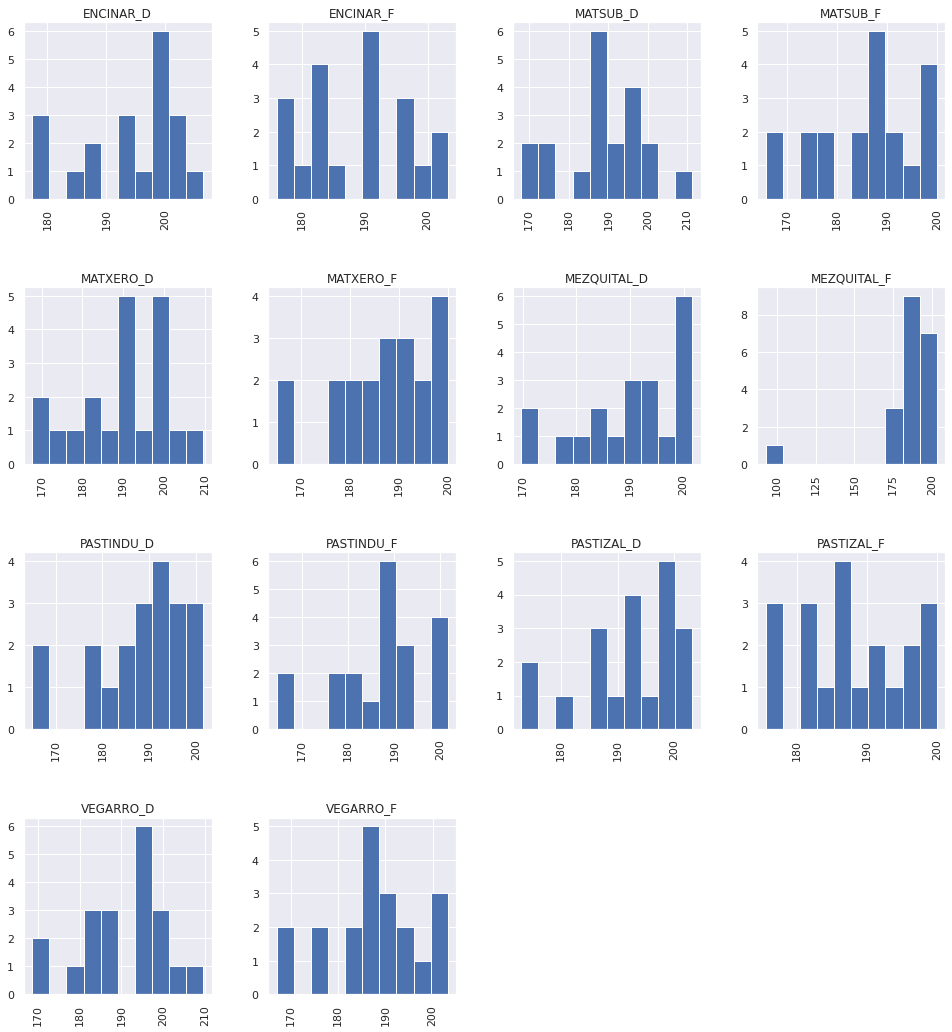

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['INICIO']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

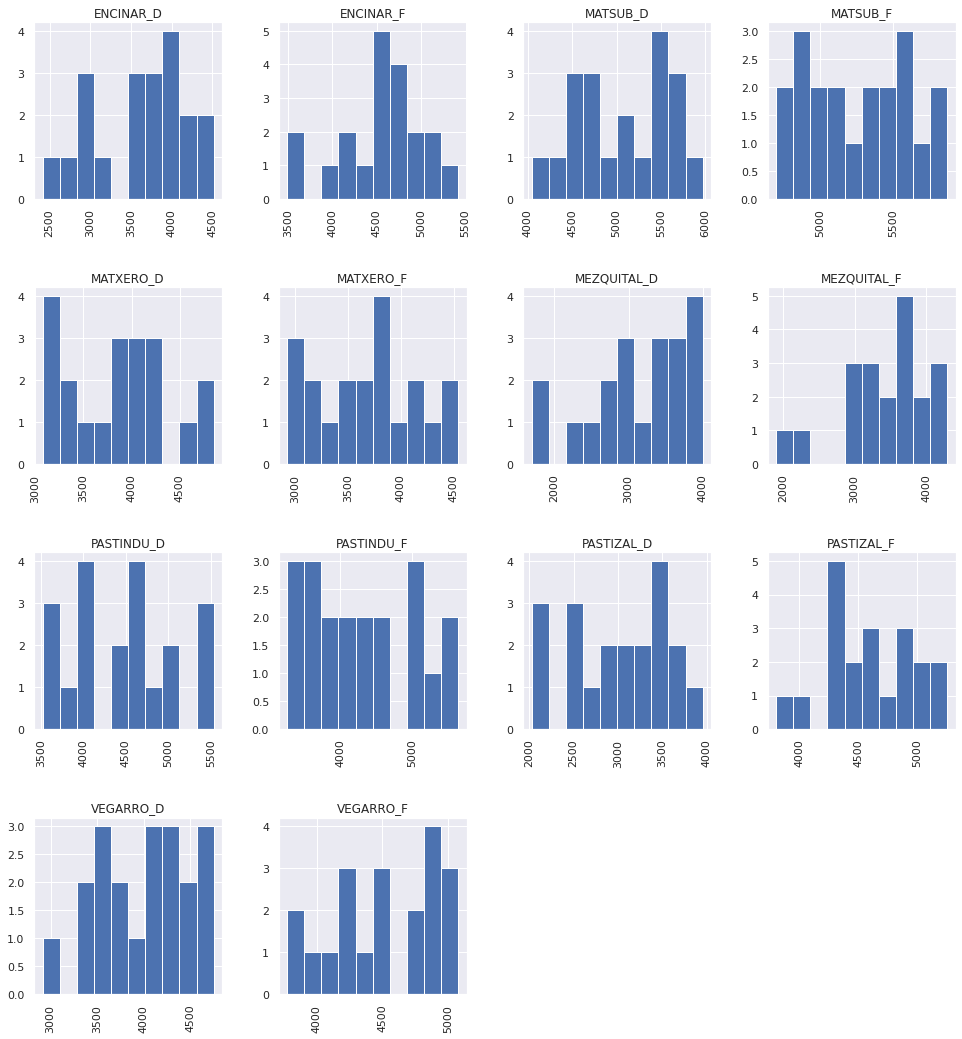

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['AMPLITUD']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

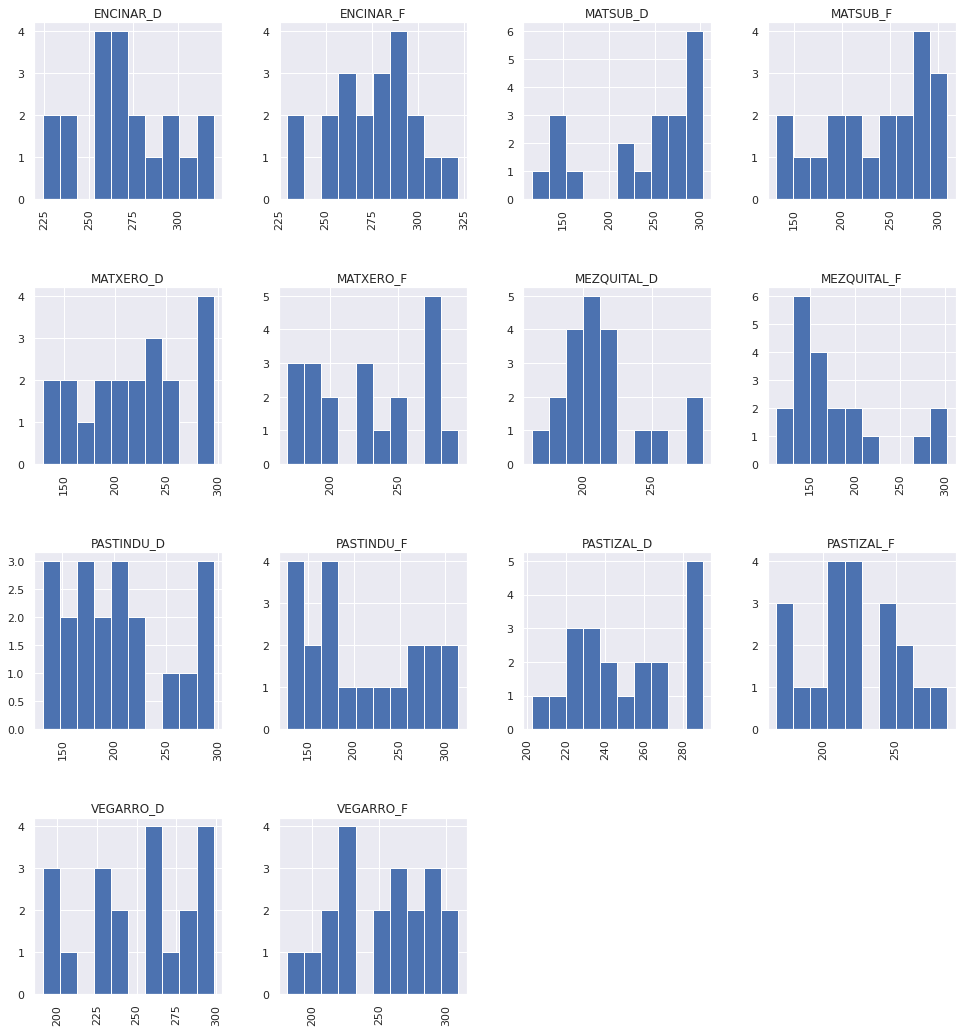

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['DURACION']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

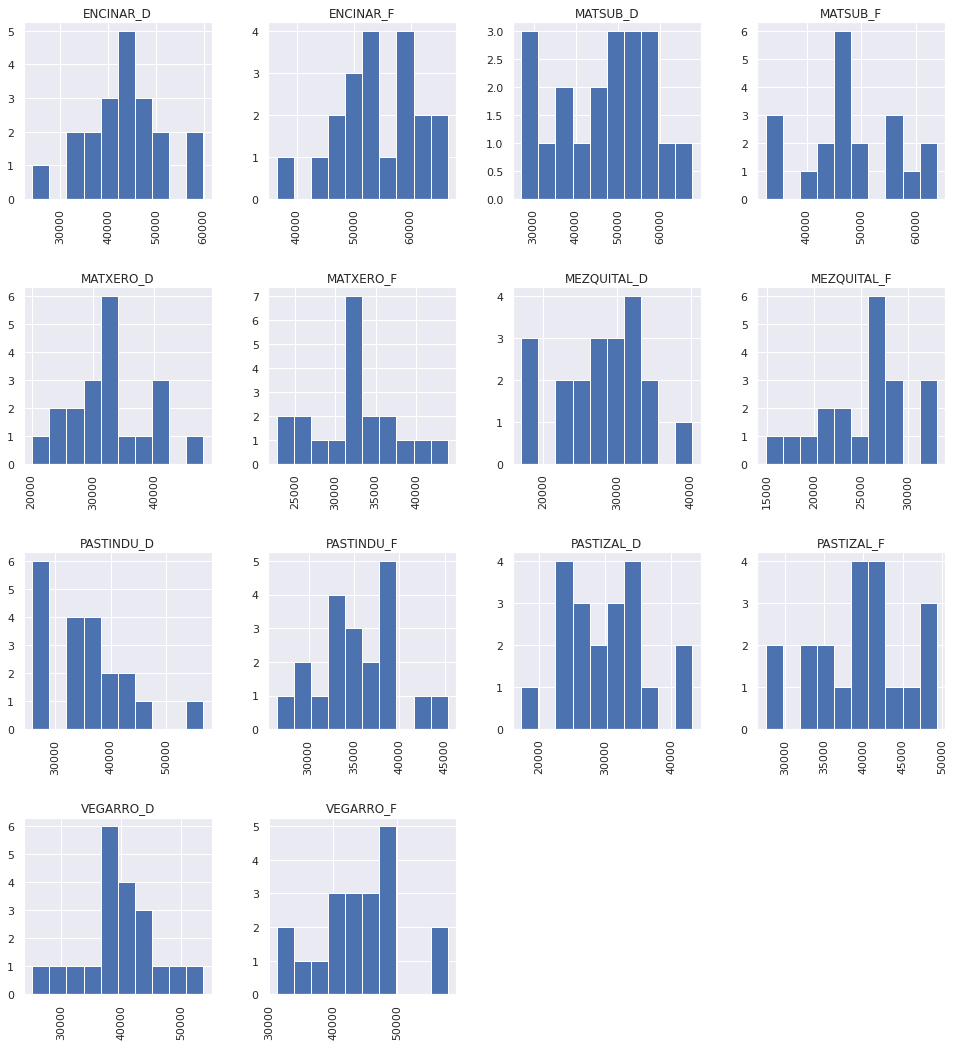

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['INTMEN']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

### Diagramas de caja


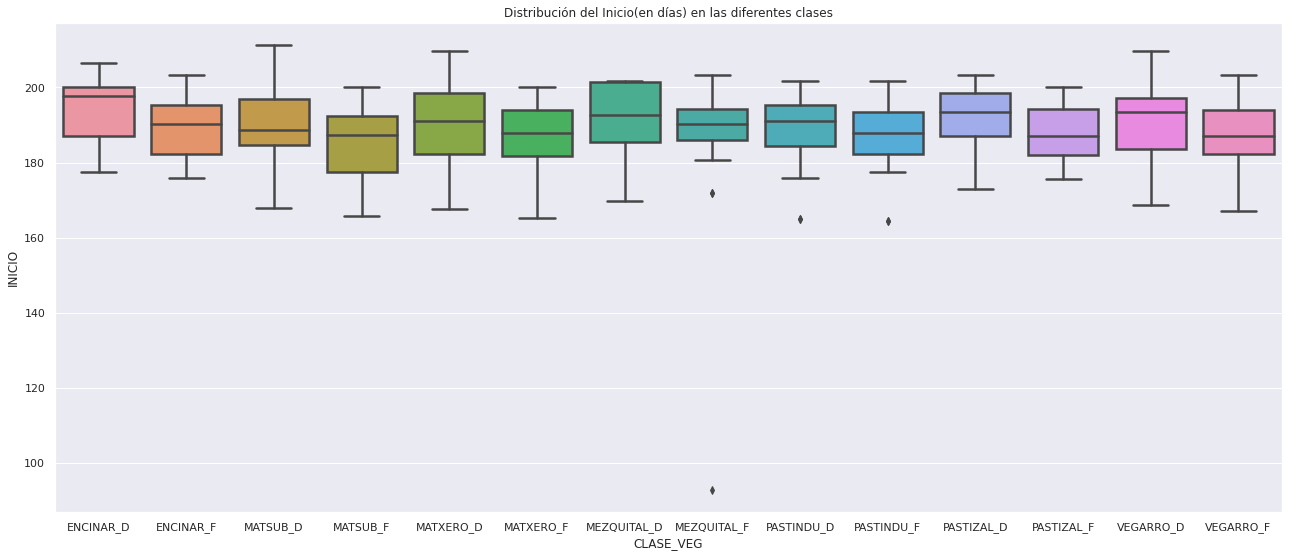

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

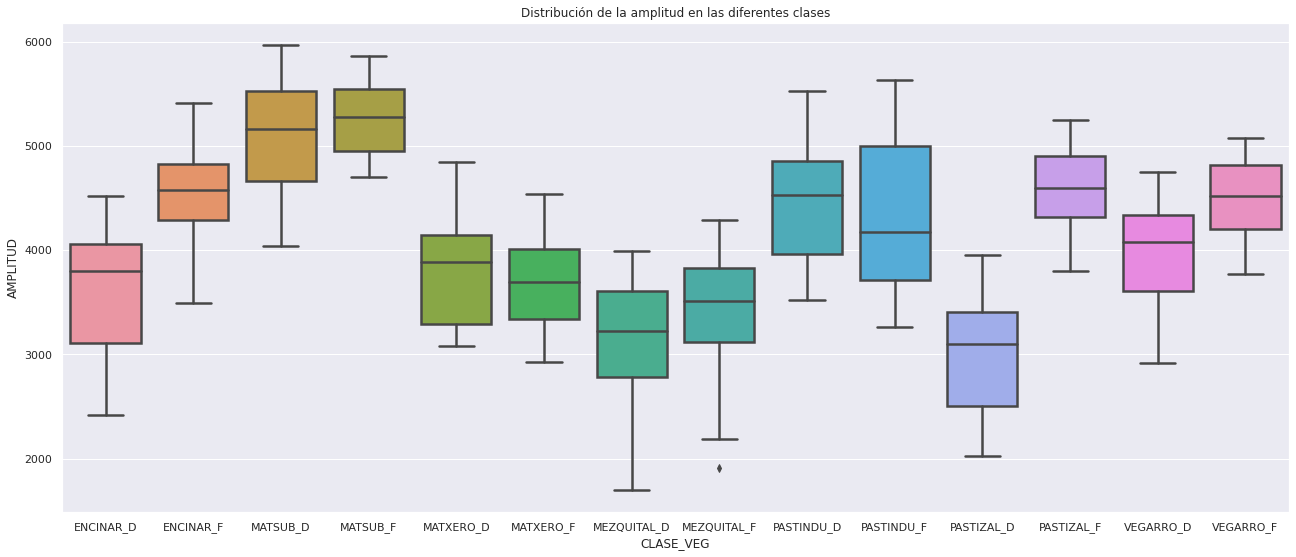

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="AMPLITUD", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la amplitud en las diferentes clases');

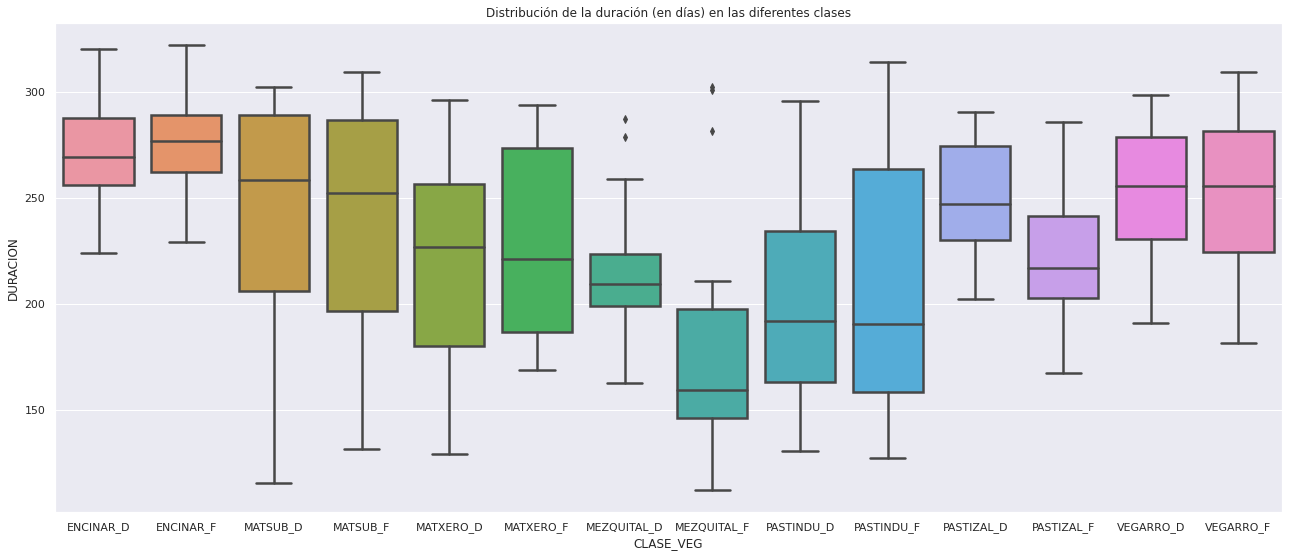

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

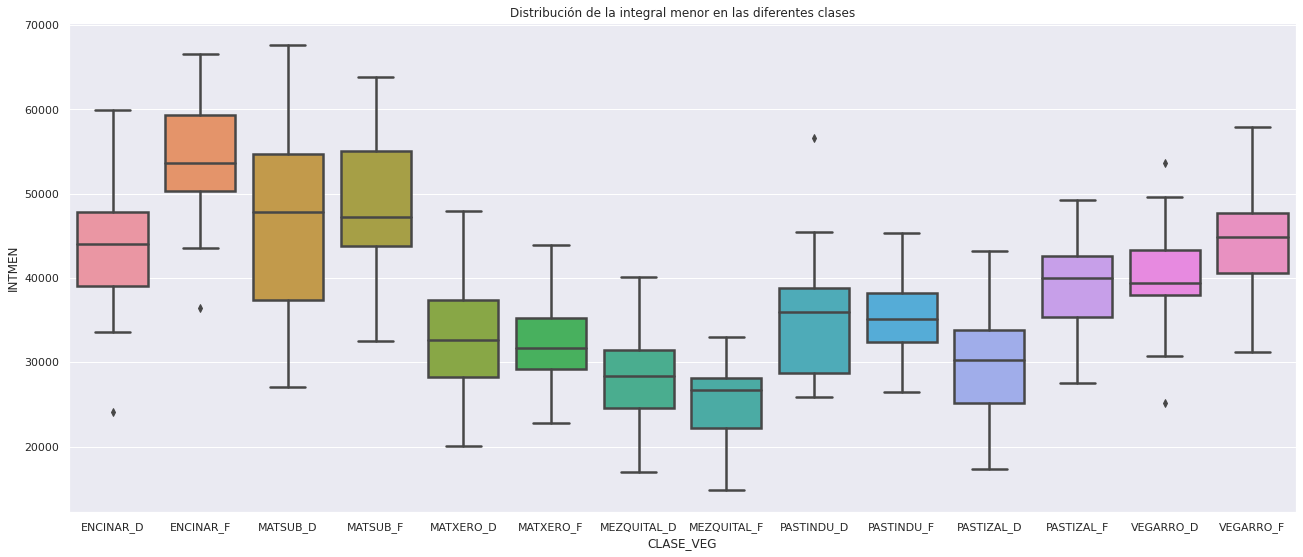

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INTMEN", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la integral menor en las diferentes clases');

### ANOVA
#### Pruebas de normalidad


In [201]:
datos_ndvi.columns = [col.split(' ')[0] for col in datos_ndvi.columns]

In [203]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
test_norm_ini_n = pg.normality(data=datos_ndvi, dv='INICIO', group='CLASE_VEG')
test_norm_ini_n.columns = [column +'_Ini' for column in test_norm_ini_n.columns]

test_norm_Amp_n = pg.normality(data=datos_ndvi, dv='AMPLITUD', group='CLASE_VEG')
test_norm_Amp_n.columns = [column +'_Amp' for column in test_norm_Amp_n.columns]

test_norm_Dur_n = pg.normality(data=datos_ndvi, dv='DURACION', group='CLASE_VEG')
test_norm_Dur_n.columns = [column +'_Dur' for column in test_norm_Dur_n.columns]

test_norm_IntMen_n = pg.normality(data=datos_ndvi, dv='INTMEN', group='CLASE_VEG')
test_norm_IntMen_n.columns = [column +'_IMen' for column in test_norm_IntMen_n.columns]

test_norm_IntMay_n = pg.normality(data=datos_ndvi, dv='INTMAY', group='CLASE_VEG')
test_norm_IntMay_n.columns = [column +'_IMay' for column in test_norm_IntMay_n.columns]


test_norm_ndvi = pd.concat([test_norm_ini_n,test_norm_Amp_n,test_norm_Dur_n,test_norm_IntMen_n,test_norm_IntMay_n], axis = 1)
test_norm_ndvi

,W_Ini,pval_Ini,normal_Ini,W_Amp,pval_Amp,normal_Amp,W_Dur,pval_Dur,normal_Dur,W_IMen,pval_IMen,normal_IMen,W_IMay,pval_IMay,normal_IMay
ENCINAR_D,0.901198,0.043430,False,0.939084,0.230399,True,0.984793,0.980265,True,0.979339,0.925287,True,0.940556,0.245649,True
ENCINAR_F,0.948538,0.345436,True,0.966716,0.684579,True,0.984064,0.975284,True,0.973928,0.834647,True,0.964897,0.645556,True
MATSUB_D,0.954693,0.443963,True,0.957515,0.495480,True,0.850629,0.005461,False,0.971099,0.777906,True,0.965904,0.667129,True
MATSUB_F,0.934936,0.192066,True,0.955522,0.458701,True,0.925547,0.126732,True,0.958830,0.520742,True,0.976555,0.882337,True
MATXERO_D,0.945483,0.303674,True,0.937783,0.217653,True,0.955086,0.450911,True,0.978959,0.919959,True,0.960327,0.550399,True
MATXERO_F,0.924212,0.119445,True,0.961596,0.576203,True,0.912750,0.071924,True,0.976315,0.878244,True,0.960415,0.552180,True
MEZQUITAL_D,0.874759,0.014259,False,0.940480,0.244842,True,0.917524,0.088795,True,0.967359,0.698423,True,0.972329,0.803111,True
MEZQUITAL_F,0.556091,0.000001,False,0.938447,0.224075,True,0.841219,0.003812,False,0.961334,0.570838,True,0.894417,0.032448,False
PASTINDU_D,0.892901,0.030416,False,0.951445,0.389560,True,0.931189,0.162765,True,0.917051,0.086958,True,0.922304,0.109744,True
PASTINDU_F,0.920598,0.101748,True,0.946563,0.317909,True,0.916262,0.083977,True,0.975698,0.867443,True,0.959962,0.543098,True


Método Levene

In [204]:
# Test de homocedasticidad / levene
factors_list = ['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']
homo_test_levene_n = pd.concat([pg.homoscedasticity(data = datos_ndvi, dv = col, group='CLASE_VEG', method = 'levene') for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
homo_test_levene_n

,,W,pval,equal_var
INICIO,levene,0.312061,0.989977,True
AMPLITUD,levene,1.543615,0.101837,True
DURACION,levene,3.264754,0.000129,False
INTMEN,levene,2.250994,0.008141,False


Método Bartlett

In [205]:
homo_test_bart_n = pd.concat([pg.homoscedasticity(data = datos_ndvi, dv = col, group='CLASE_VEG', method = 'bartlett') for col in factors_list], 
                            axis = 0, 
                            keys=factors_list)
homo_test_bart

,,T,pval,equal_var
INICIO,bartlett,145.510805,1.649666e-24,False
AMPLITUD,bartlett,18.899502,1.262527e-01,True
DURACION,bartlett,104.113534,2.635611e-16,False
INTMEN,bartlett,13.664892,3.978599e-01,True


### ANOVA

In [207]:
# One Way ANOVA
ANOVA_ndvi = pd.concat([pg.anova(data = datos_ndvi, dv = col, between='CLASE_VEG', detailed=True) for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
ANOVA_ndvi

Source            SS   DF            MS          F  \
INICIO   0  CLASE_VEG  1.602439e+03   13  1.232645e+02   0.942895   
         1     Within  3.477416e+04  266  1.307299e+02        NaN   
AMPLITUD 0  CLASE_VEG  1.222330e+08   13  9.402540e+06  31.509939   
         1     Within  7.937418e+07  266  2.983992e+05        NaN   
DURACION 0  CLASE_VEG  1.854166e+05   13  1.426282e+04   7.246446   
         1     Within  5.235544e+05  266  1.968250e+03        NaN   
INTMEN   0  CLASE_VEG  1.793666e+10   13  1.379743e+09  27.029252   
         1     Within  1.357831e+10  266  5.104629e+07        NaN   

                   p-unc       np2  
INICIO   0  5.089368e-01  0.044051  
         1           NaN       NaN  
AMPLITUD 0  1.794480e-46  0.606293  
         1           NaN       NaN  
DURACION 0  4.133718e-12  0.261529  
         1           NaN       NaN  
INTMEN   0  2.053888e-41  0.569147  
         1           NaN       NaN

### Método de Kruskal - Wallis

In [208]:
kruskal_test_ndvi = pd.concat([pg.kruskal(data = datos_ndvi, dv = col, between='CLASE_VEG',) for col in factors_list], 
                           axis = 0, 
                           keys=factors_list)
kruskal_test_ndvi

,,Source,ddof1,H,p-unc
INICIO,Kruskal,CLASE_VEG,13,14.821786,3.186101e-01
AMPLITUD,Kruskal,CLASE_VEG,13,173.312362,3.912925e-30
DURACION,Kruskal,CLASE_VEG,13,68.996528,1.227605e-09
INTMEN,Kruskal,CLASE_VEG,13,160.114931,1.868393e-27
